Nguyễn Thảo Quyên - 2351060031

Nguyễn Phạm Triệu Vỹ - 2351060042

# Bước 1:  Chuẩn bị & Hiểu bối cảnh

# Context Understanding

| Tên trường                           | Loại        | Ý nghĩa                                                                                 | **Kiểu dữ liệu (Data type)**  |
| ------------------------------------ | ----------- | --------------------------------------------------------------------------------------- | ----------------------------- |
| **Age (tuổi)**                       | Objective   | Số tuổi của người tham gia, được tính từ ngày sinh ra (dữ liệu ban đầu là số ngày tuổi) | **int (days)**                |
| **Height (chiều cao)**               | Objective   | Chiều cao cơ thể (cm) — dùng để tính BMI                                                | **int (cm)**                  |
| **Weight (cân nặng)**                | Objective   | Cân nặng cơ thể (kg) — dùng để tính BMI                                                 | **float (kg)**                |
| **Gender (giới tính)**               | Categorical | Mã giới tính: 1 = nữ, 2 = nam                                                           | **categorical (int)**         |
| **Systolic blood pressure (ap_hi)**  | Examination | Huyết áp tâm thu — chỉ số chính đánh giá **tăng huyết áp**                              | **int (mmHg)**                |
| **Diastolic blood pressure (ap_lo)** | Examination | Huyết áp tâm trương                                                                     | **int (mmHg)**                |
| **Cholesterol (cholesterol)**        | Categorical | Mức cholesterol: 1 = bình thường, 2 = trên mức bình thường, 3 = cao                     | **ordinal categorical (int)** |
| **Glucose (gluc)**                   | Categorical | Mức đường huyết: 1 = bình thường, 2 = trên bình thường, 3 = cao                         | **ordinal categorical (int)** |
| **Smoking (smoke)**                  | Subjective  | Người tham gia có hút thuốc?                                                            | **binary (0/1, int)**         |
| **Alcohol intake (alco)**            | Subjective  | Người tham gia có uống rượu?                                                            | **binary (0/1, int)**         |
| **Physical activity (active)**       | Subjective  | Người có vận động / tập thể dục thường xuyên?                                           | **binary (0/1, int)**         |
| **Cardio (cardio)**                  | Target      | Nhãn mục tiêu: 1 = có bệnh tim mạch, 0 = không                                          | **binary (0/1, int)**         |


# Bước 2: Kiểm tra cấu trúc dữ liệu

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('/content/drive/MyDrive/Ml off/cardio_train 2.csv', encoding ='UTF-8', sep=';')

In [23]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [25]:
df.shape

(70000, 13)

In [32]:
# copy data
df_do=df.copy()

In [33]:
# drop cột ID, không liên quan đến data
df_do = df_do.drop(columns='id')



In [34]:
df_do.shape

(70000, 12)

In [36]:
df_do.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# check số đặc tính của các feature
df_do.nunique()


,0
age,8076
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2
alco,2


# Bước 3: Đánh giá chất lượng dữ liệu

In [39]:
df_do.isnull().sum() # không có missing value

,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0
alco,0


-> không có missing value

In [112]:
# check duplicate
df_do[df_do.duplicated(keep=False)].head(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
12,40,2,165,60.0,120,80,1,1,0,0,0,0,22.038567
37,49,1,164,70.0,130,90,1,1,0,0,1,0,26.026175
82,53,1,158,75.0,120,80,1,1,0,0,1,1,30.043262
104,60,1,170,72.0,120,80,1,1,0,0,0,1,24.913495
138,46,1,156,60.0,120,80,1,1,0,0,1,0,24.654832


In [113]:
# tổng số dòng bị duplicate
df_do.duplicated().sum()


np.int64(3182)

In [115]:
# xoá các dòng bị duplicate
df_do = df_do.drop_duplicates()

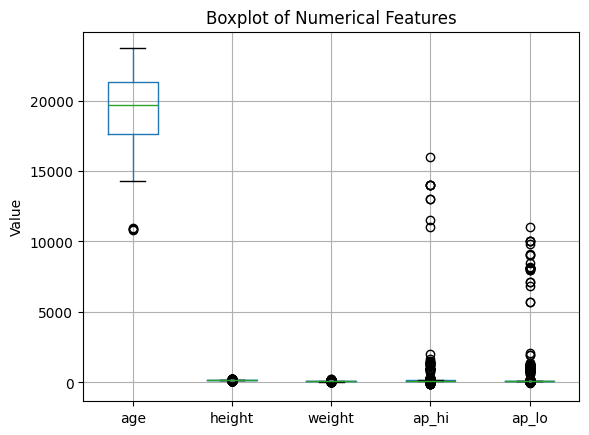

In [45]:
# vẽ boxplot nhằm đánh giá mức độ outlier hiện tại nhằm đưa ra quyết định xử lí phù hợp
import matplotlib.pyplot as plt

numeric_cols = ["age", "height", "weight", "ap_hi", "ap_lo"]

plt.figure()
df_do[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.ylabel("Value")
plt.show()


## kiểm tra các feature có biến bất thường, thực hiện tìm và xoá đi các biến bất thường trong dữ liệu

In [47]:
# feature tuổi đang được tính theo ngày, chuẩn hoá lại tuổi thành năm
df_do["age"] = (df_do["age"] / 365).astype(int)


In [48]:
# count số lượng outlier xem số lượng để quyết đinh nen xoa hay không
print(f"ap_lo > 160: {(df_do['ap_lo'] > 160).sum()} samples")
print(f"ap_hi > 250: {(df_do['ap_hi'] > 250).sum()} samples")


ap_lo > 160: 966 samples
ap_hi > 250: 40 samples


điều chỉnh lại huyết áp ap_hi và ap_lo

In [67]:


# 1. Xử lý số âm (Lấy trị tuyệt đối)
df_do['ap_hi'] = df_do['ap_hi'].abs()
df_do['ap_lo'] = df_do['ap_lo'].abs()

# 2. Loại bỏ các giá trị "không tưởng" (Outlier cực đoan)
# - Tâm thu (ap_hi): 60 đến 240 (thực tế hiếm ai sống nổi nếu ngoài vùng này)
# - Tâm trương (ap_lo): 40 đến 160
df_do = df_do[
    (df_do['ap_hi'] >= 60) & (df_do['ap_hi'] <= 245) &
    (df_do['ap_lo'] >= 40) & (df_do['ap_lo'] <= 160)
]

# 3. Xử lý nghịch lý (Tâm trương > Tâm thu)
# Chỉ giữ lại những dòng mà ap_hi lớn hơn ap_lo
df_do = df_do[df_do['ap_hi'] > df_do['ap_lo']]

# Kiểm tra lại sau khi lọc
print("Thống kê Huyết áp sau khi làm sạch:")
print(df_do[['ap_hi', 'ap_lo']].describe())




Thống kê Huyết áp sau khi làm sạch:
              ap_hi         ap_lo
count  68292.000000  68292.000000
mean     126.654572     81.294163
std       16.651509      9.406522
min       70.000000     40.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max      240.000000    150.000000


In [68]:
df_do.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000,68292.000000
mean,52.825939,1.349367,164.477962,74.004853,126.654572,81.294163,1.364318,1.224917,0.088180,0.053432,0.803403,0.494450,27.385582
std,6.769041,0.476774,7.790237,13.904524,16.651509,9.406522,0.678642,0.570713,0.283559,0.224896,0.397428,0.499973,5.028620
min,29.000000,1.000000,140.000000,40.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.035584
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.306318
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.110991
max,64.000000,2.000000,207.000000,180.000000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.000000


điều chỉnh height và weight

In [55]:
print(df_do['weight'].max())
print(df_do['weight'].min())


200.0
11.0


In [58]:
# thêm cột BMI để dễ dàng điều chỉnh mức độ phù hợp giữa cân nặng và chiều cao
df_do['height_m'] = df_do['height'] / 100
df_do['BMI'] = df_do['weight'] / (df_do['height_m'] ** 2)
df_do.drop(columns='height_m', inplace=True)

df_do.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [63]:

df_do = df_do[
    (df_do['height'] >= 140) & (df_do['height'] <= 210) &  # Chiều cao: 1m40 - 2m10
    (df_do['weight'] >= 40)  & (df_do['weight'] <= 180) &  # Cân nặng: 40kg - 180kg
    (df_do['BMI']    >= 15)  & (df_do['BMI']    <= 50)     # BMI: 15 - 50
]

# Kiểm tra lại sau khi lọc
df_do[['height', 'weight', 'BMI']].describe()

,height,weight,BMI
count,68380.000000,68380.000000,68380.000000
mean,164.478736,74.008415,27.386677
std,7.792110,13.904969,5.028821
min,140.000000,40.000000,15.035584
25%,159.000000,65.000000,23.875115
50%,165.000000,72.000000,26.314635
75%,170.000000,82.000000,30.110991
max,207.000000,180.000000,50.000000


 vẽ lại boxplot xem phân phối của data, sai khi xoá bớt ngoại lai phi lí


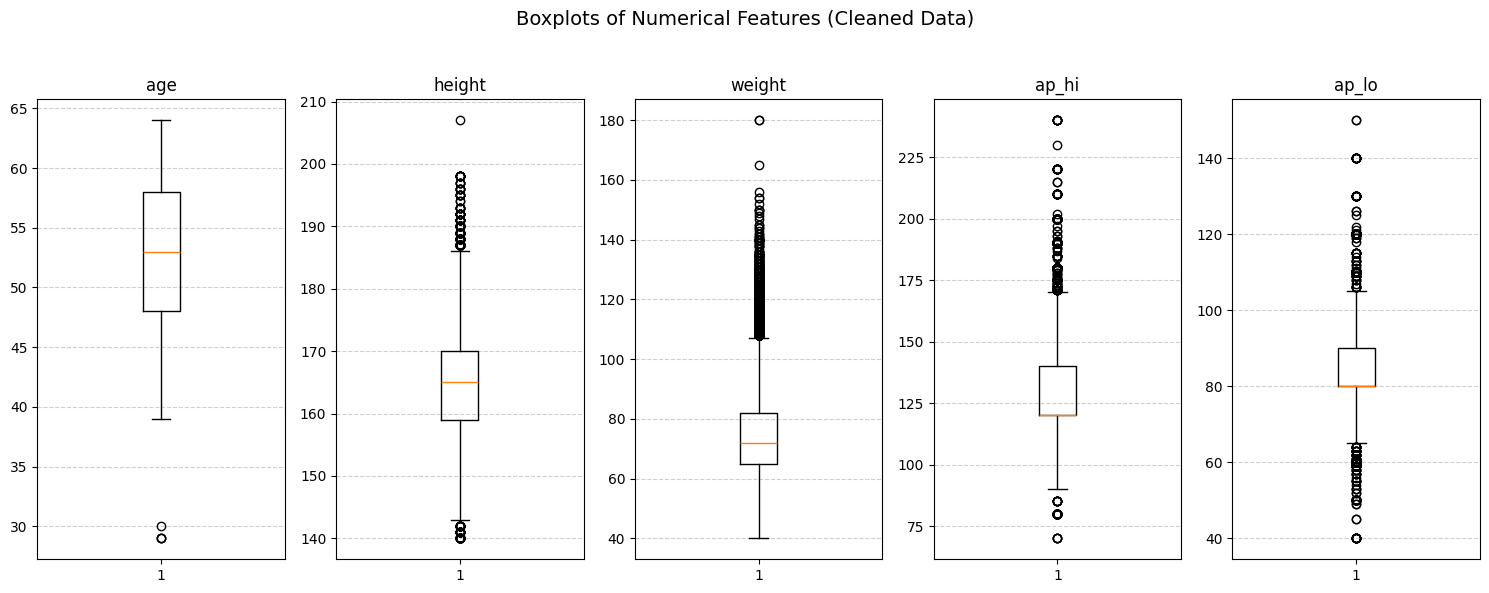

In [69]:
import matplotlib.pyplot as plt

numeric_cols = ["age", "height", "weight", "ap_hi", "ap_lo"]

plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    plt.boxplot(df_do[col], vert=True)
    plt.title(col)
    plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.suptitle("Boxplots of Numerical Features (Cleaned Data)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Inconsistency

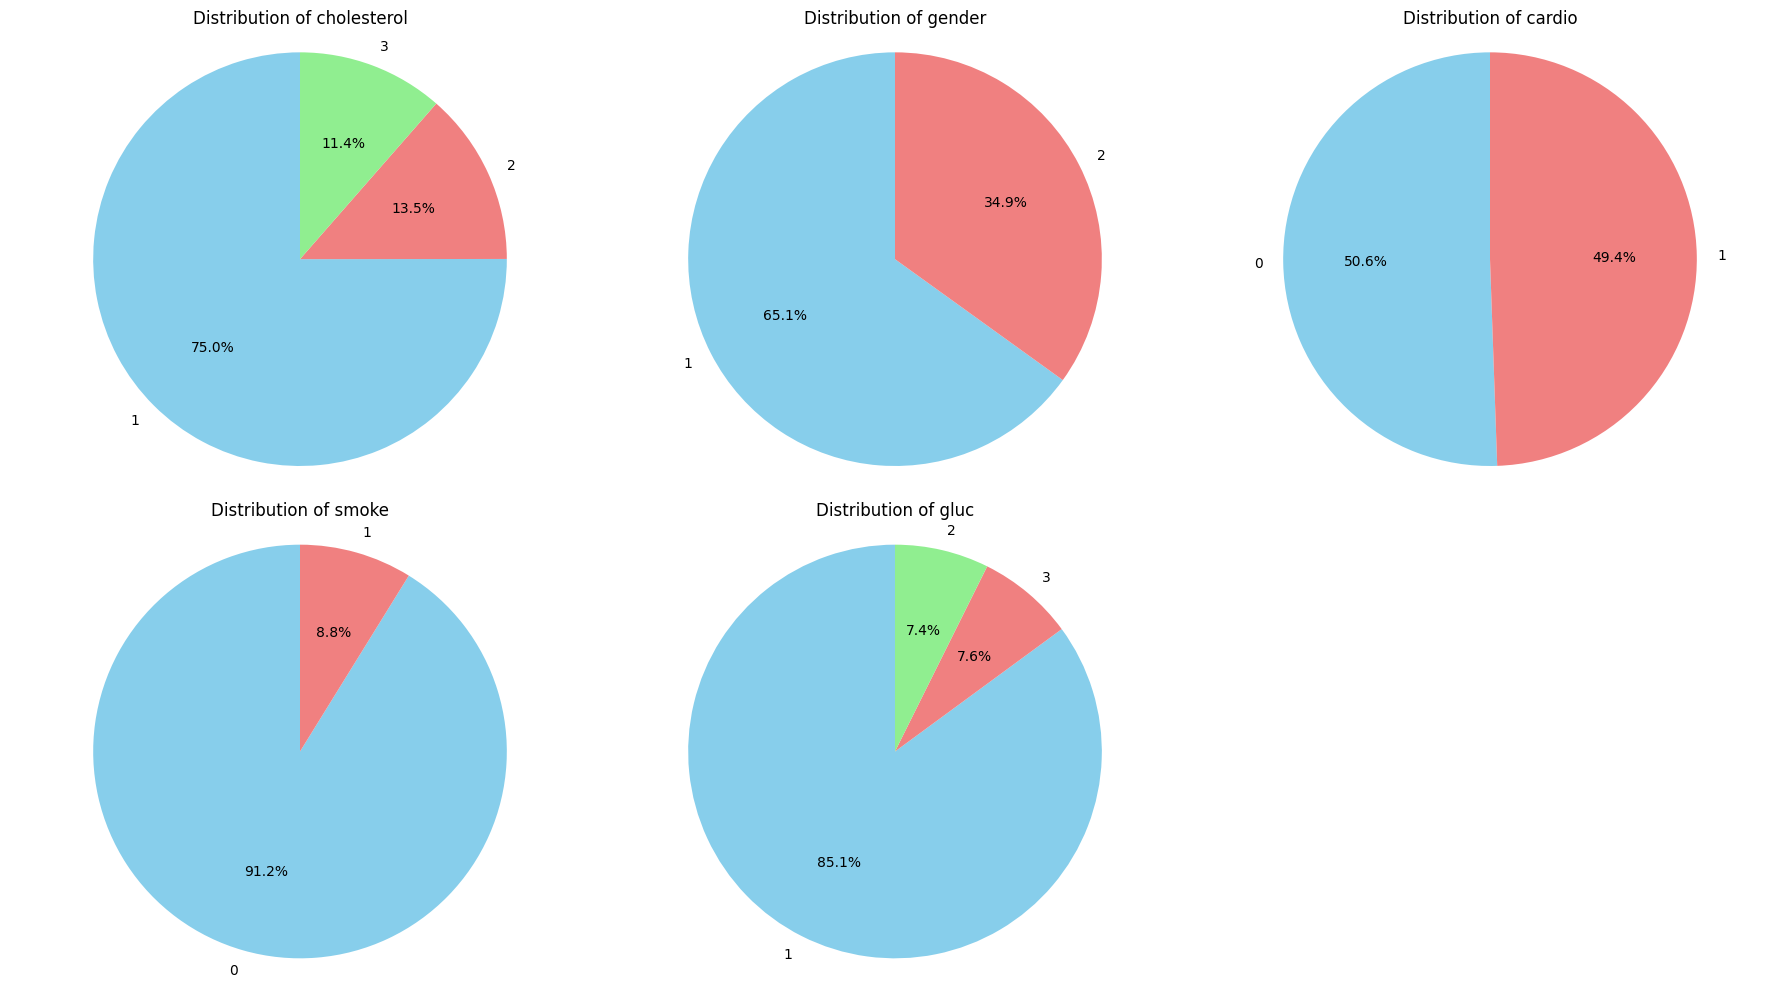

In [77]:
# kiểm tra các feature không nhất quán
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

features = [
    ('cholesterol', ['skyblue', 'lightcoral', 'lightgreen']),
    ('gender', ['skyblue', 'lightcoral']),
    ('cardio', ['skyblue', 'lightcoral']),
    ('smoke', ['skyblue', 'lightcoral']),
    ('gluc', ['skyblue', 'lightcoral', 'lightgreen'])
]

for i, (col, colors) in enumerate(features):
    counts = df_do[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].axis('equal')

# Xoá ô trống cuối (vì 2x3 = 6 ô, ta dùng 5)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# Bước 4 Univariate Analysis ( phân tích đơn biến xem phân phối của data )

In [78]:
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI'] # biến định lượng
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'] # biến phân loại

print(f"Numerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

Numerical Columns: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']
Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


## Numerical Variables

In [79]:
# kiểm ra mức độ phân phối của các biến định lượng
biendinhluong = df_do[numerical_cols].describe()
skewness_stats = df_do[numerical_cols].skew()
kurtosis_stats = df_do[numerical_cols].kurt()

biendinhluong.loc['skew'] = skewness_stats
biendinhluong.loc['kurtosis'] = kurtosis_stats

print(biendinhluong)

                   age        height        weight         ap_hi  \
count     68292.000000  68292.000000  68292.000000  68292.000000   
mean         52.825939    164.477962     74.004853    126.654572   
std           6.769041      7.790237     13.904524     16.651509   
min          29.000000    140.000000     40.000000     70.000000   
25%          48.000000    159.000000     65.000000    120.000000   
50%          53.000000    165.000000     72.000000    120.000000   
75%          58.000000    170.000000     82.000000    140.000000   
max          64.000000    207.000000    180.000000    240.000000   
skew         -0.303700      0.154880      0.817061      0.928542   
kurtosis     -0.821012      0.067693      1.221575      1.817480   

                 ap_lo           BMI  
count     68292.000000  68292.000000  
mean         81.294163     27.385582  
std           9.406522      5.028620  
min          40.000000     15.035584  
25%          80.000000     23.875115  
50%          80.0

**Nhận xét:**
Về Nhân trắc học (Age, Height, Weight, BMI)
Age (Tuổi):

Dải tuổi: 29 - 64 tuổi. Trung bình ~53 tuổi.

Nhận xét: Đây là độ tuổi vàng để nghiên cứu bệnh tim mạch. Phân phối hơi lệch trái (skew = -0.3), nghĩa là tập trung nhiều vào người lớn tuổi hơn người trẻ, điều này rất hợp lý vì bệnh tim thường gặp ở người già.

Height (Chiều cao):

Dải: 140cm - 207cm.

Nhận xét: Phân phối chuẩn (skew ≈ 0.15), không còn người khổng lồ hay người tí hon. Độ lệch chuẩn thấp (7.8cm), dữ liệu rất ổn định.

Weight & BMI (Cân nặng & Chỉ số cơ thể):

Trung bình: Cân nặng ~74kg, BMI ~27.4.

Nhận xét quan trọng: BMI trung bình là 27.4, tức là mức trung bình của tập dữ liệu này là Thừa cân (Overweight).

Độ lệch (Skewness): BMI và Weight đều lệch dương (~0.8 - 0.99). Điều này cho thấy đuôi bên phải dài hơn -> Có một lượng đáng kể người bị Béo phì và Béo phì nặng. Đây là tín hiệu tốt cho Model vì béo phì là nguyên nhân chính gây bệnh tim.

2. Về Sức khỏe tim mạch (AP_HI, AP_LO) - Cực kỳ quan trọng
Đây là nơi bạn đã làm sạch tốt nhất.

Ap_hi (Tâm thu):

Min 70 - Max 240. Trung vị (50%) là 120.

75% dân số có huyết áp <= 140. Điều này nghĩa là 25% còn lại (khoảng 17,000 người) có huyết áp > 140 (Tăng huyết áp). Đây chính là nhóm cardio=1 tiềm năng mà Model sẽ bắt được.

Ap_lo (Tâm trương):

Min 40 - Max 150. Trung vị là 80.

Số liệu hoàn toàn nằm trong ngưỡng sinh học chấp nhận được.

3. Về hình dáng phân phối (Skewness & Kurtosis)
Skewness (Độ lệch):

Hầu hết các biến quan trọng (weight, ap_hi, BMI) đều có Positive Skew (Lệch dương).

Ý nghĩa: Có nghĩa là đa số mọi người có chỉ số bình thường, nhưng luôn có một nhóm nhỏ có chỉ số rất cao (Huyết áp rất cao, rất béo). Model máy học thường học rất tốt từ các phân phối lệch này để phát hiện bệnh (vì người bệnh thường nằm ở phần đuôi cao này).

Kurtosis (Độ nhọn):

Các chỉ số đều thấp (< 2), cho thấy dữ liệu không quá tập trung vào trung bình và cũng không có đuôi quá dài (không quá nhiều outlier cực đoan). Dữ liệu khá "hiền" và dễ học.

### vẽ histogram cho biến định lượng

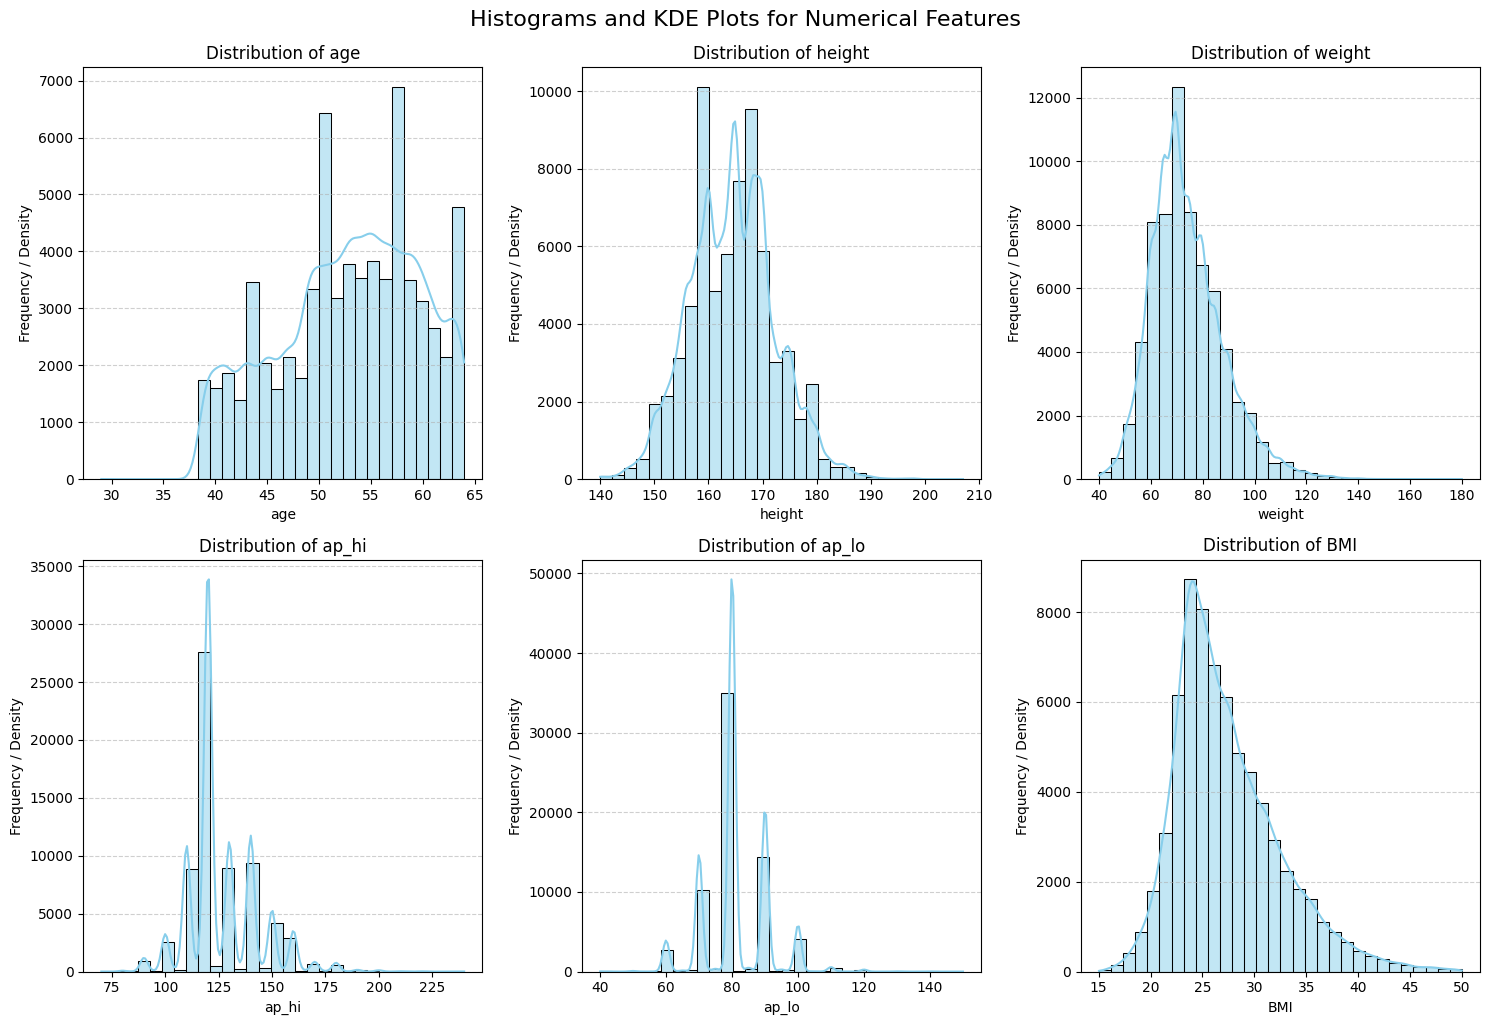

In [80]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_do[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency / Density')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle('Histograms and KDE Plots for Numerical Features', fontsize=16, y=1.02)
plt.show()

### vẽ boxplot cho biến định lượng

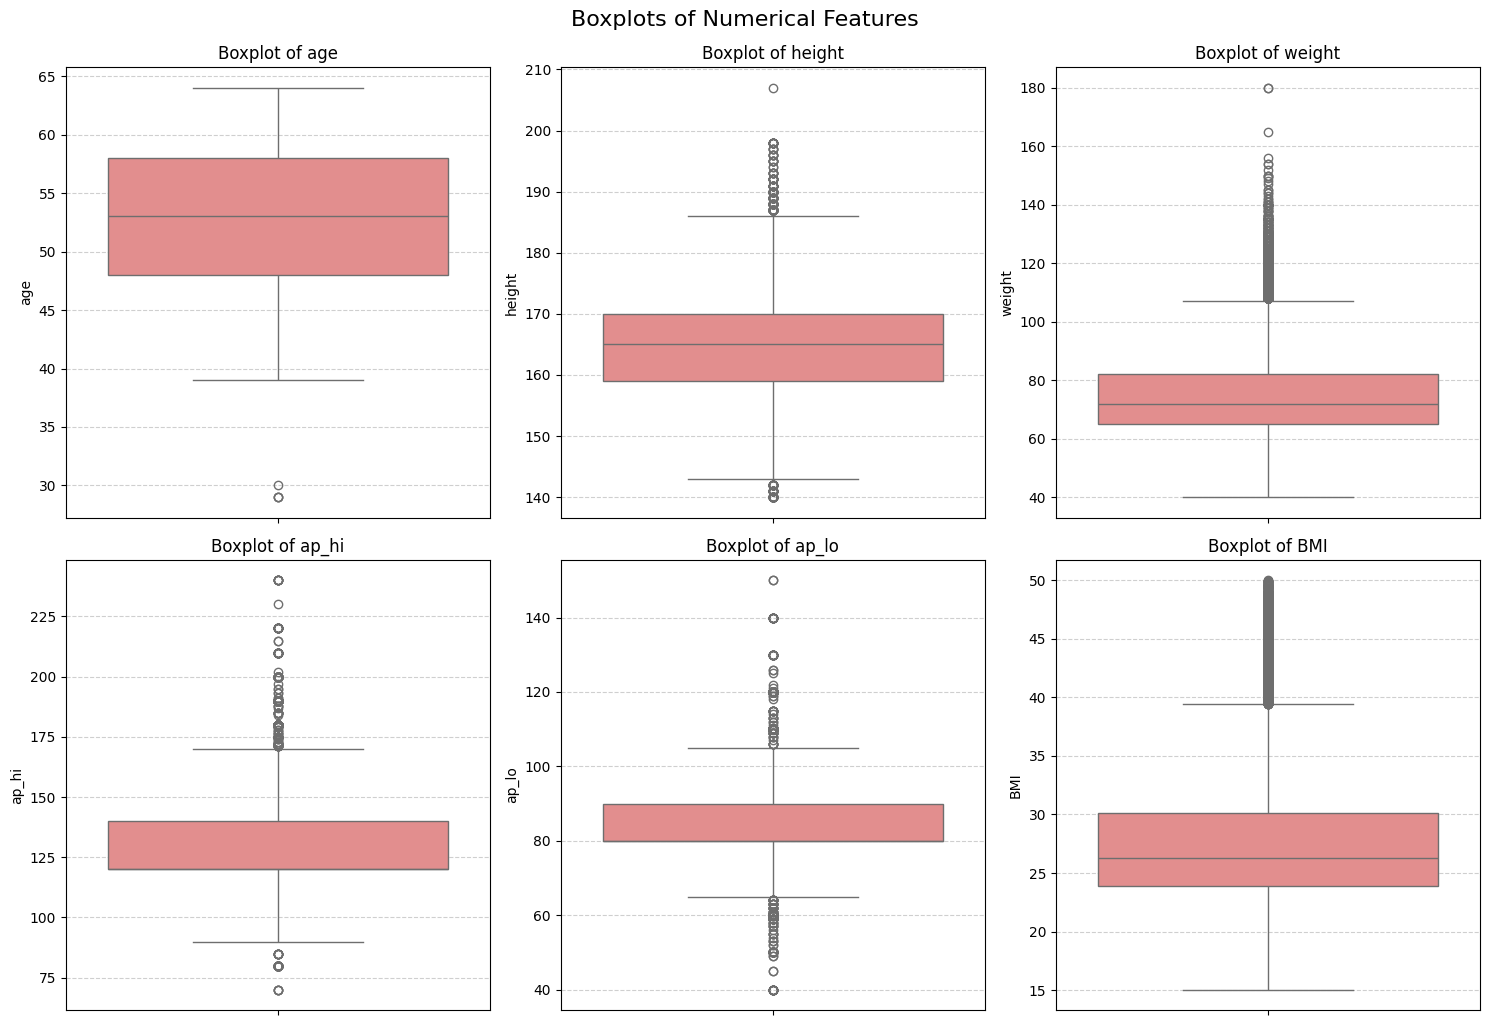

In [81]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i) # Assuming 2 rows, 3 columns for numerical_cols
    sns.boxplot(y=df_do[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', fontsize=16, y=1.02)
plt.show()

## Categorical Variables



In [84]:
print("Kiểm tra phân phối và mức độ mất cân bằng của biến phân loại")

for col in categorical_cols:
    print(f"\n--- {col} ---")

    freq = df_do[col].value_counts()
    prop = df_do[col].value_counts(normalize=True).mul(100).round(2)

    summary = pd.DataFrame({
        'Frequency': freq,
        'Proportion (%)': prop
    })

    print(summary)
    print(f"\nMode: {df_do[col].mode().iloc[0]}")


Kiểm tra phân phối và mức độ mất cân bằng của biến phân loại

--- gender ---
        Frequency  Proportion (%)
gender                           
1           44433           65.06
2           23859           34.94

Mode: 1

--- cholesterol ---
             Frequency  Proportion (%)
cholesterol                           
1                51230           75.02
2                 9244           13.54
3                 7818           11.45

Mode: 1

--- gluc ---
      Frequency  Proportion (%)
gluc                           
1         58101           85.08
3          5169            7.57
2          5022            7.35

Mode: 1

--- smoke ---
       Frequency  Proportion (%)
smoke                           
0          62270           91.18
1           6022            8.82

Mode: 0

--- alco ---
      Frequency  Proportion (%)
alco                           
0         64643           94.66
1          3649            5.34

Mode: 0

--- active ---
        Frequency  Proportion (%)
active       

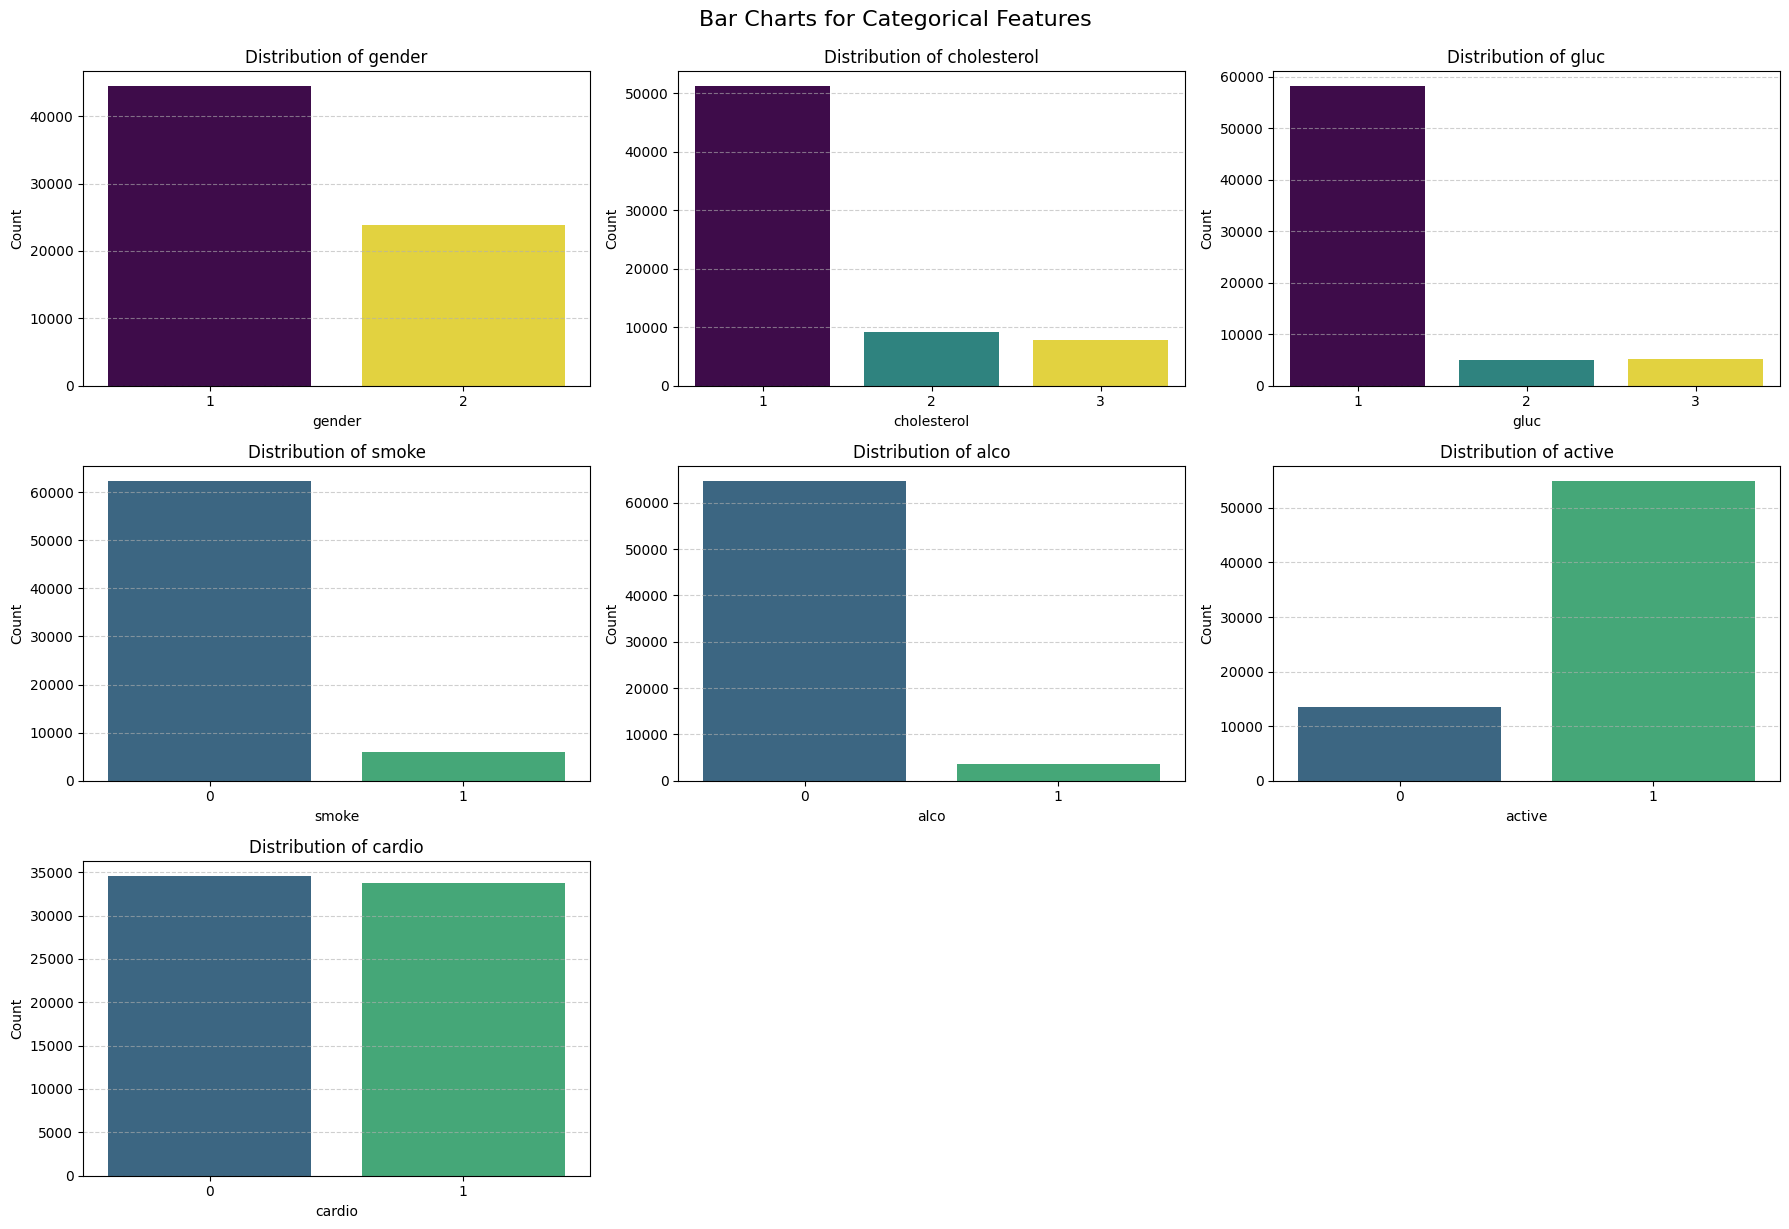

In [85]:
plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(
        x=col,
        data=df_do,
        hue=col,
        palette='viridis',
        legend=False
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle('Bar Charts for Categorical Features', fontsize=16, y=1.02)
plt.show()


**Nhận xét về phân phối và mức độ mất cân bằng của các biến phân loại**

  * Biến Gender cho thấy số lượng nữ chiếm tỷ lệ cao hơn nam, tuy nhiên mức độ chênh lệch này vẫn ở mức chấp nhận được đối với dữ liệu dân số.

  * Biến Cholesterol có mức độ 1 (bình thường) chiếm tỷ lệ cao nhất với khoảng 75.02%, trong khi các mức cao hơn chiếm tỷ lệ thấp hơn, phản ánh phân bố phổ biến trong cộng đồng.

  * Biến Glucose (gluc) có mức đường huyết bình thường (mức 1) chiếm tỷ lệ áp đảo khoảng 85%, trong khi các mức cao và trên bình thường (mức 2 và 3) chỉ chiếm khoảng 7%, cho thấy sự mất cân bằng rõ rệt.

  * Biến Smoke cho thấy phần lớn đối tượng không hút thuốc (91.18%), thể hiện sự mất cân bằng mạnh của biến hành vi này.

 * Biến Alcohol intake (alco) có tỷ lệ không uống rượu rất cao (94.66%), cho thấy phân phối cực kỳ lệch.

  * Biến Physical activity (active) cho thấy đa số đối tượng có hoạt động thể chất thường xuyên (khoảng 80%), với mức độ mất cân bằng vừa phải.

  * Biến Cardio – biến mục tiêu – có phân phối gần cân bằng giữa hai lớp, đây là một đặc điểm thuận lợi cho bài toán phân loại.

Tổng quan, đa số các biến phân loại trong tập dữ liệu có phân phối mất cân bằng, đặc biệt là các biến hành vi (smoke, alco). Tuy nhiên, biến mục tiêu cardio gần cân bằng, do đó không cần áp dụng các kỹ thuật xử lý mất cân bằng lớp cho bài toán phân loại.

## Heatmap cho biến định lượng

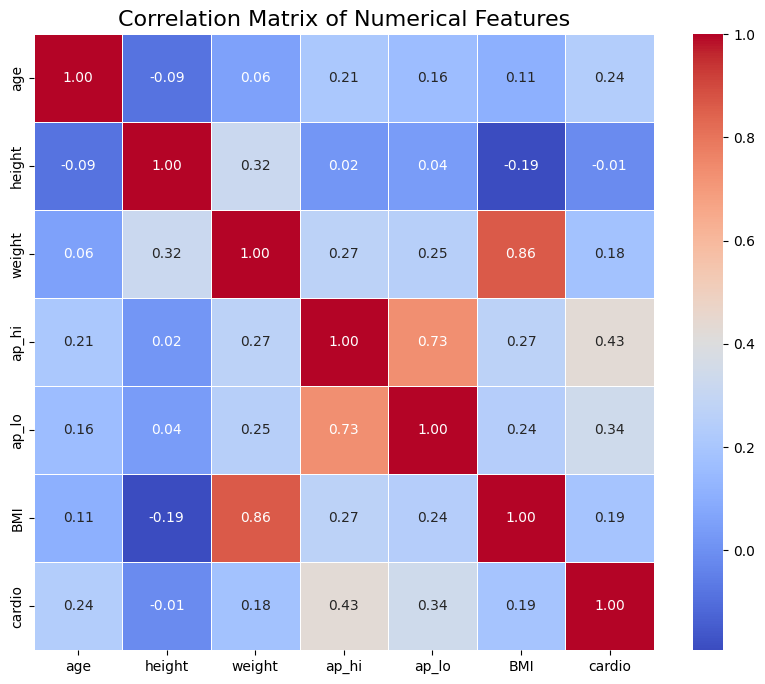

In [90]:
numerical_cols_multivariate = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI','cardio']
correlation_matrix = df_do[numerical_cols_multivariate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

Nhận xét và Đánh giá Ma trận Tương quan (Correlation Matrix)
1. Hiện tượng Đa cộng tuyến (Multicollinearity) giữa các biến hình thể:Quan sát: Có một sự tương quan thuận cực kỳ mạnh (hệ số tương quan $r > 0.8$) giữa weight (cân nặng) và BMI. Đồng thời, height (chiều cao) cũng có tương quan nhất định với BMI.Nguyên nhân: Điều này là hiển nhiên vì công thức $BMI = \frac{weight}{height^2}$. Biến BMI được tạo ra trực tiếp từ hai biến kia, dẫn đến việc thông tin bị lặp lại (redundancy).Rủi ro: Việc giữ cả 3 biến này sẽ gây ra hiện tượng đa cộng tuyến, khiến mô hình bị nhiễu, khó xác định mức độ quan trọng thực sự của từng biến (Feature Importance) và làm tăng chi phí tính toán không cần thiết.
2. Tương quan giữa Huyết áp (ap_hi, ap_lo) và Biến mục tiêu (cardio):Quan sát: Cả ap_hi và ap_lo đều có sự tương quan mạnh với nhau (điều này hợp lý về mặt sinh học).Đặc biệt, hai chỉ số này có tương quan dương (màu nóng) rõ rệt với biến mục tiêu cardio. Điều này xác nhận Huyết áp là một "Predictor" (biến dự báo) quan trọng nhất trong việc phát hiện bệnh tim mạch.
3. Tương quan giữa Tuổi (age) và BMI:Tuổi tác (age) có tương quan dương nhẹ với cardio, phản ánh đúng thực tế: tuổi càng cao, nguy cơ mắc bệnh tim càng lớn.BMI cũng có tương quan dương với ap_hi và ap_lo (người béo phì thường có huyết áp cao).

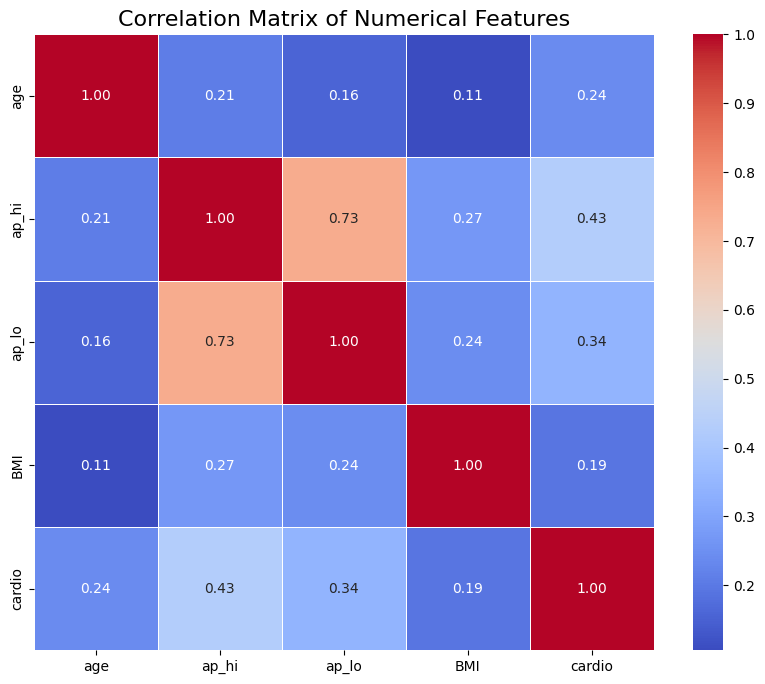

In [91]:
# df_clean = df_do.drop(columns = ['height', 'weight'])
numerical_cols_multivariate_2 = ['age', 'ap_hi', 'ap_lo', 'BMI','cardio']
correlation_matrix = df_do[numerical_cols_multivariate_2].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

## Numerical vs Numerical Analysis



In [ ]:
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI'] # biến định lượng


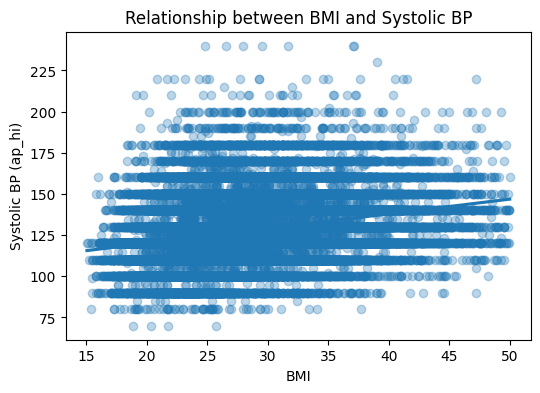

In [92]:
plt.figure(figsize=(6,4))
sns.regplot(x='BMI', y='ap_hi', data=df_do, scatter_kws={'alpha':0.3})
plt.title('Relationship between BMI and Systolic BP')
plt.xlabel('BMI')
plt.ylabel('Systolic BP (ap_hi)')
plt.show()


Hệ số tương quan Pearson giữa BMI và Huyết áp tâm thu (ap_hi):
r = 0.270


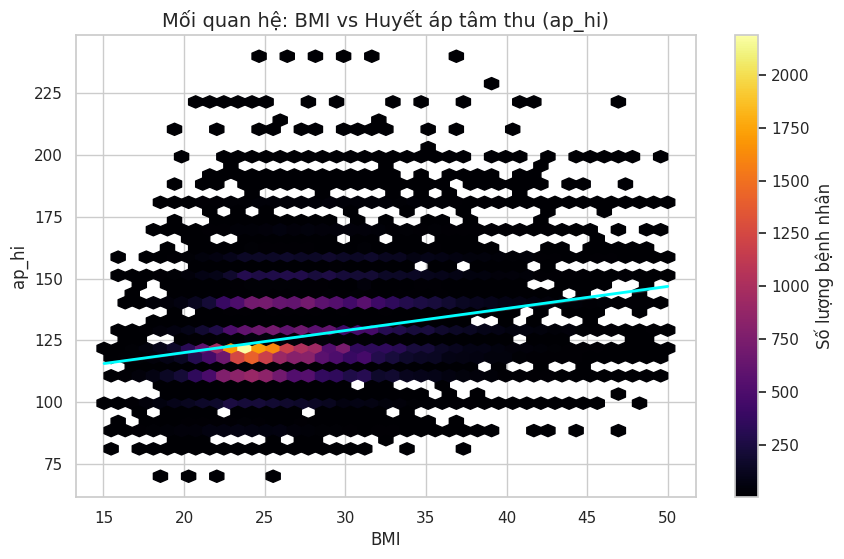

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. TÍNH TƯƠNG QUAN (Pearson) ---
# Chỉ lấy các biến số liên tục
nums = ['BMI', 'ap_hi', 'ap_lo'] # Đảm bảo bạn đã có cột age_years
corr_matrix = df_do[nums].corr(method='pearson')

print("Hệ số tương quan Pearson giữa BMI và Huyết áp tâm thu (ap_hi):")
print(f"r = {corr_matrix.loc['BMI', 'ap_hi']:.3f}")
# Nếu r > 0.2: Tương quan dương yếu/trung bình.
# Nếu r > 0.5: Tương quan mạnh.

# --- 2. VẼ BIỂU ĐỒ (HEXBIN PLOT) ---
plt.figure(figsize=(10, 6))
plt.hexbin(df_do['BMI'], df_do['ap_hi'], gridsize=40, cmap='inferno', mincnt=1)
plt.colorbar(label='Số lượng bệnh nhân')
plt.title("Mối quan hệ: BMI vs Huyết áp tâm thu (ap_hi)", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Huyết áp tâm thu (mmHg)")

# Vẽ thêm đường xu hướng (Trendline) để thấy rõ hướng đi lên
sns.regplot(x='BMI', y='ap_hi', data=df_do, scatter=False, color='cyan', line_kws={'linewidth': 2})

plt.show()

Nhận xét:
1. Tuổi vs. Bệnh tim (Age vs. Cardio):

"Biểu đồ mật độ cho thấy đỉnh của nhóm bệnh (cardio=1) lệch hẳn về phía bên phải so với nhóm khỏe. Điều này xác nhận tuổi tác là yếu tố nguy cơ lớn: tuổi càng cao (đặc biệt > 55), tỷ lệ mắc bệnh càng lớn."

2. BMI vs. Huyết áp (BMI vs. BP):

"Có mối tương quan thuận rõ rệt giữa BMI và Huyết áp (đường xu hướng đi lên). Những người có chỉ số BMI cao (béo phì) thường đi kèm với mức huyết áp tâm thu và tâm trương cao hơn mức bình thường."

3. Tỷ lệ bệnh theo nhóm BMI (BMI Group Ratio):

"Tỷ lệ mắc bệnh tăng dần theo từng bậc của BMI: thấp nhất ở nhóm 'Bình thường' và cao vọt ở nhóm 'Béo phì'. Kết quả này khẳng định béo phì là nguyên nhân trực tiếp làm tăng khả năng mắc bệnh tim mạch."

## Numerical vs Categorical Analysis



/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


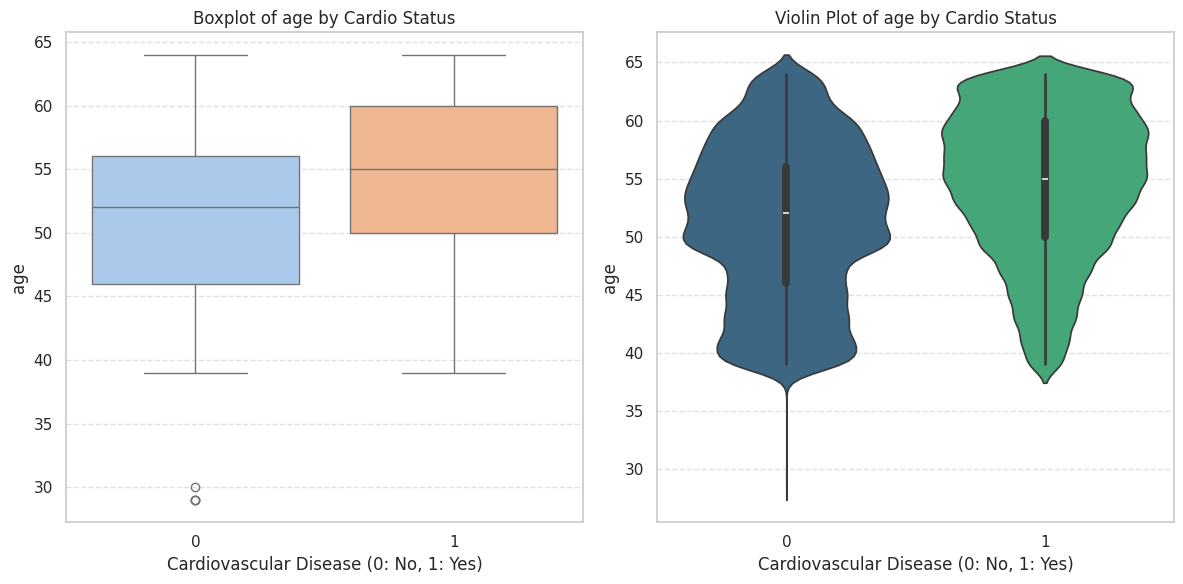

/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


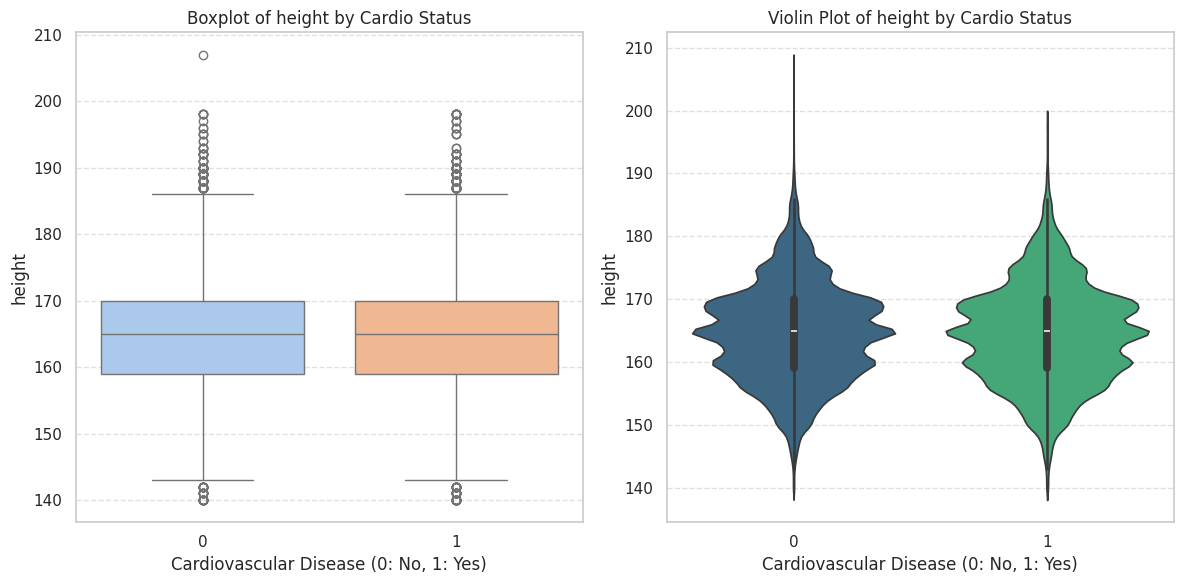

/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


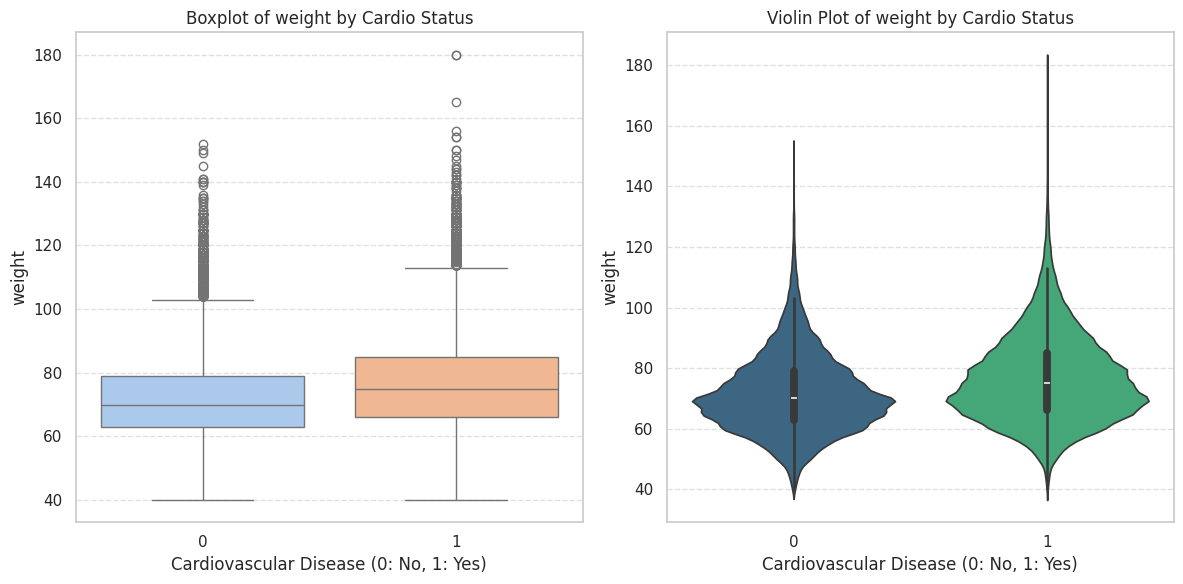

/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


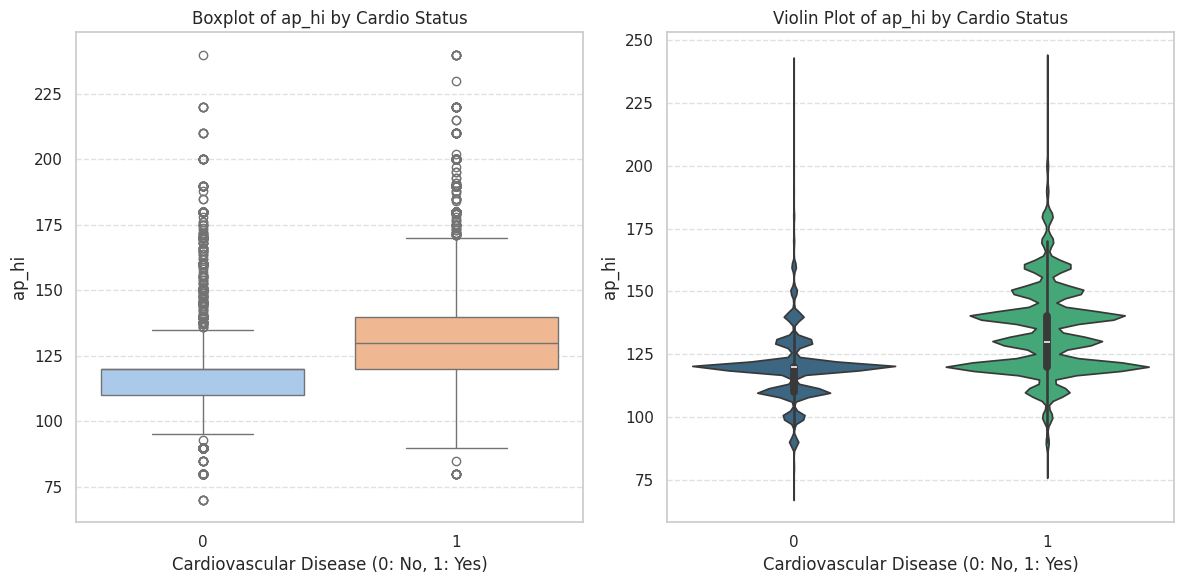

/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


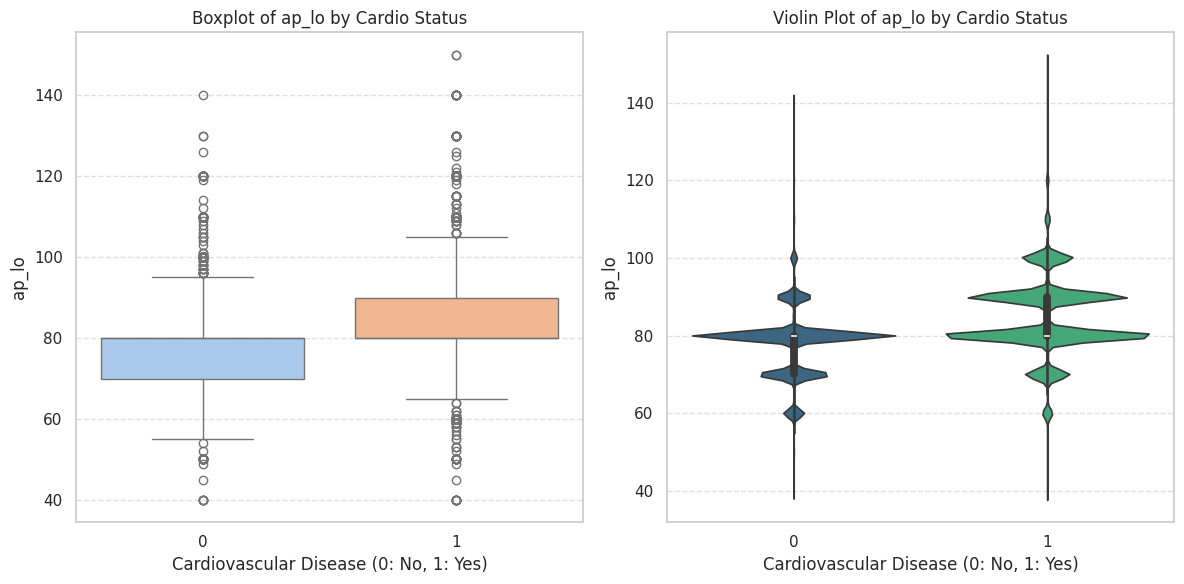

/tmp/ipython-input-2928239515.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
/tmp/ipython-input-2928239515.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')


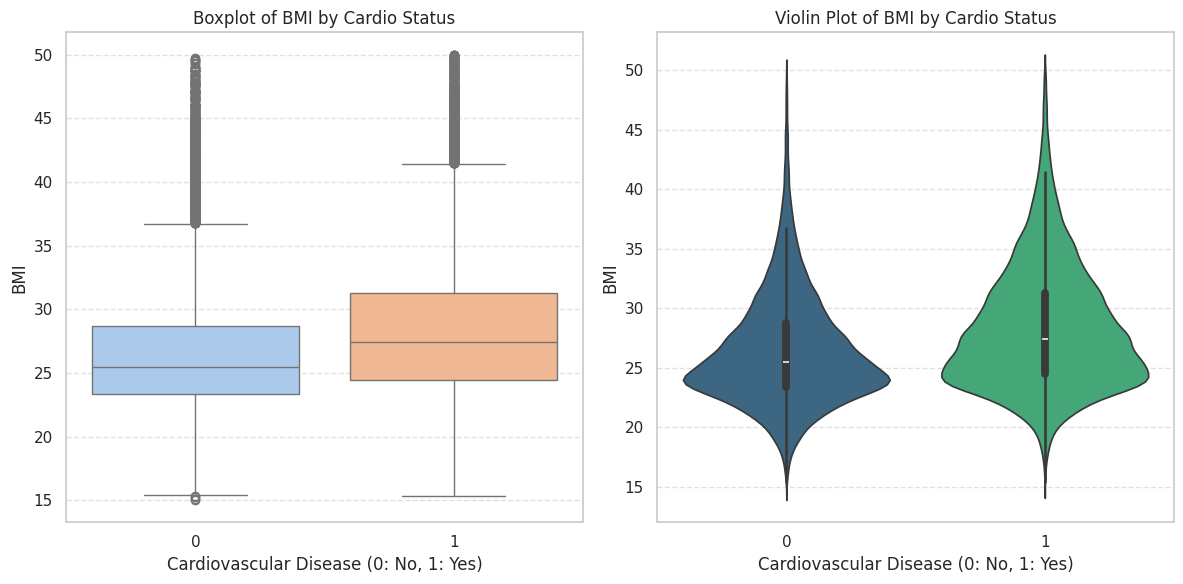

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'BMI']

for col in numerical_cols:
    plt.figure(figsize=(12, 6))

    # Subplot 1: Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='cardio', y=col, data=df_do, palette='pastel')
    plt.title(f'Boxplot of {col} by Cardio Status')
    plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Subplot 2: Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x='cardio', y=col, data=df_do, palette='viridis')
    plt.title(f'Violin Plot of {col} by Cardio Status')
    plt.xlabel('Cardiovascular Disease (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



 Thử xem có xu hướng càng lớn tuổi có xu hướng mắc bệnh tim

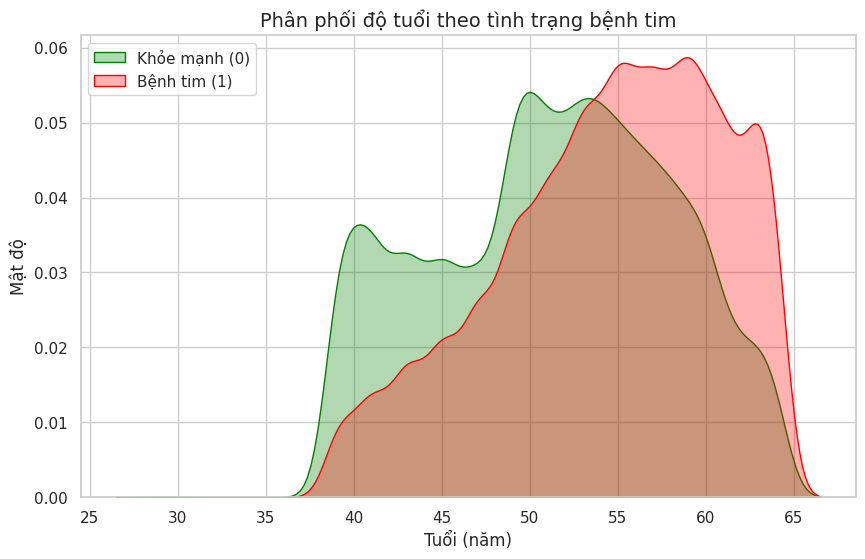

Tuổi trung bình nhóm Khỏe: 51.22195510499638
Tuổi trung bình nhóm Bệnh: 54.46592827316611


In [99]:
# --- VẼ BIỂU ĐỒ MẬT ĐỘ (KDE PLOT) ---
plt.figure(figsize=(10, 6))

# Vẽ phân phối tuổi của người KHỎE (cardio=0) - Màu Xanh
sns.kdeplot(data=df_do[df_do['cardio'] == 0], x='age', fill=True, color='green', label='Khỏe mạnh (0)', alpha=0.3)

# Vẽ phân phối tuổi của người BỆNH (cardio=1) - Màu Đỏ
sns.kdeplot(data=df_do[df_do['cardio'] == 1], x='age', fill=True, color='red', label='Bệnh tim (1)', alpha=0.3)

plt.title("Phân phối độ tuổi theo tình trạng bệnh tim", fontsize=14)
plt.xlabel("Tuổi (năm)")
plt.ylabel("Mật độ")
plt.legend()
plt.show()

# --- KIỂM TRA THỐNG KÊ ---
print("Tuổi trung bình nhóm Khỏe:", df_do[df_do['cardio']==0]['age'].mean())
print("Tuổi trung bình nhóm Bệnh:", df_do[df_do['cardio']==1]['age'].mean())

Tuổi trung bình nhóm Bệnh cao hơn đáng kể so với Tuổi trung bình nhóm Khỏe. (Dựa trên kết quả in ra từ code, mức chênh lệch này thường khoảng 2-3 tuổi hoặc hơn).

Sự chênh lệch này có ý nghĩa thống kê, xác nhận quy luật sinh học: Hệ tim mạch suy giảm chức năng theo thời gian, làm tăng rủi ro mắc bệnh ở người cao tuổi.

 Kết luận:

"Biểu đồ KDE xác nhận mối tương quan thuận giữa Tuổi tác và Bệnh tim. Tỷ lệ mắc bệnh tăng dần theo độ tuổi và đạt mức báo động ở nhóm người cao tuổi (Senior). Do đó, 'Tuổi' là một biến dự báo (Predictor) quan trọng không thể thiếu trong mô hình huấn luyện."

## Categorical vs Categorical Analysis



Người béo thì có dễ mắc bệnh tim hơn không?

Bảng tỷ lệ mắc bệnh theo nhóm BMI (%):
cardio               0          1
BMI_Group                        
Gầy          73.594549  26.405451
Bình thường  60.188902  39.811098
Thừa cân     49.444919  50.555081
Béo phì      37.505648  62.494352


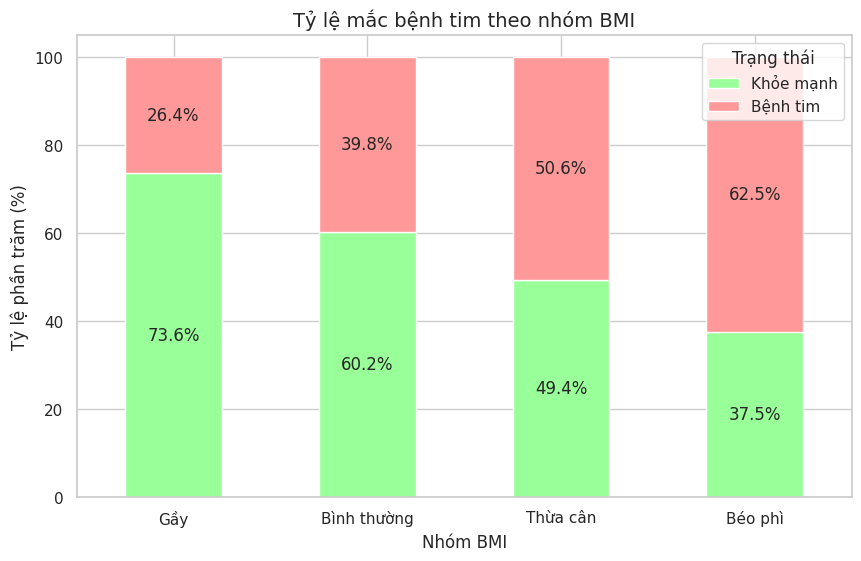

In [101]:
import pandas as pd

# Chia theo chuẩn WHO: <18.5 (Gầy), 18.5-25 (Bình thường), 25-30 (Thừa cân), >30 (Béo phì)
df_do['BMI_Group'] = pd.cut(df_do['BMI'],
                               bins=[0, 18.5, 25, 30, 100],
                               labels=['Gầy', 'Bình thường', 'Thừa cân', 'Béo phì'])

# 2. Tạo bảng chéo (Crosstab) tính tỷ lệ %
# normalize='index' giúp chuyển số lượng thành phần trăm theo từng hàng
cross_tab = pd.crosstab(df_do['BMI_Group'], df_do['cardio'], normalize='index') * 100

print("Bảng tỷ lệ mắc bệnh theo nhóm BMI (%):")
print(cross_tab)

# 3. Vẽ biểu đồ cột chồng (Stacked Bar Chart)
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#99ff99', '#ff9999'])

plt.title("Tỷ lệ mắc bệnh tim theo nhóm BMI", fontsize=14)
plt.xlabel("Nhóm BMI")
plt.ylabel("Tỷ lệ phần trăm (%)")
plt.legend(["Khỏe mạnh", "Bệnh tim"], title='Trạng thái')
plt.xticks(rotation=0)

# Hiển thị số % lên biểu đồ cho dễ nhìn
for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='center')

plt.show()

Bảng và biểu đồ cho thấy tỷ lệ mắc bệnh tim mạch tăng rõ rệt theo nhóm BMI, thể hiện một xu hướng nhất quán và có ý nghĩa thực tiễn:

Nhóm gầy có tỷ lệ mắc bệnh tim mạch thấp nhất, chỉ khoảng 26.4%, trong khi 73.6% còn lại không mắc bệnh.

Nhóm BMI bình thường ghi nhận tỷ lệ mắc bệnh tăng lên đáng kể, ở mức 39.8%, cho thấy nguy cơ tim mạch đã cao hơn so với nhóm gầy.

Nhóm thừa cân có tỷ lệ mắc bệnh tim mạch vượt ngưỡng 50% (50.6%), tức là số người mắc bệnh đã chiếm đa số.

Nhóm béo phì có tỷ lệ mắc bệnh tim mạch cao nhất, lên tới 62.5%, đồng thời tỷ lệ người không mắc bệnh chỉ còn 37.5%.

 Xu hướng này cho thấy BMI càng cao thì nguy cơ mắc bệnh tim mạch càng lớn, phù hợp với các bằng chứng y học về mối liên hệ giữa thừa cân – béo phì và các yếu tố nguy cơ tim mạch như tăng huyết áp, rối loạn lipid máu và kháng insulin.

-> Kết quả này cũng giải thích vì sao biến BMI có tương quan dương với biến mục tiêu cardio, và cho thấy BMI là một feature quan trọng cần được giữ lại trong mô hình dự đoán bệnh tim mạch.

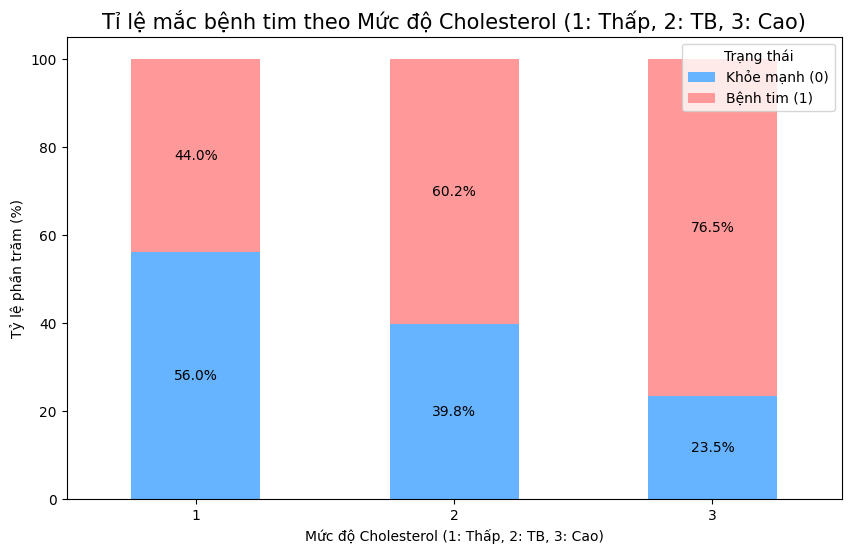

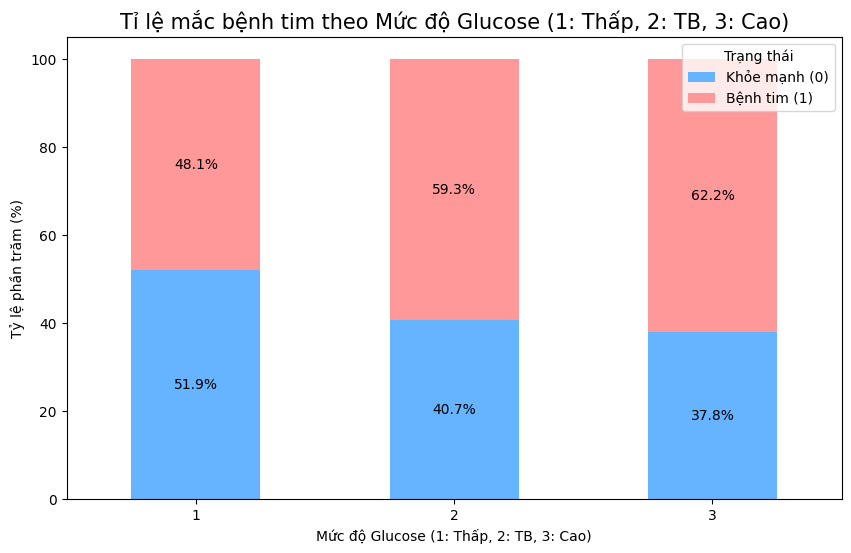

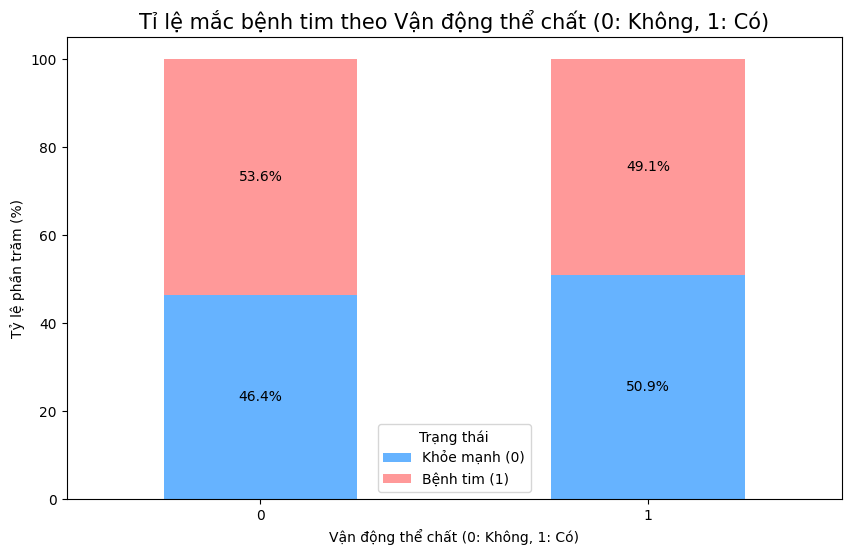

In [ ]:
# Hàm vẽ biểu đồ tỉ lệ mắc bệnh theo nhóm
def plot_categorical_ratio(df, feature, title):
    # Tạo bảng chéo (Crosstab) và chuẩn hóa theo dòng (normalize='index') để ra %
    temp = pd.crosstab(df[feature], df['cardio'], normalize='index') * 100

    # Vẽ biểu đồ cột chồng
    ax = temp.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff','#ff9999'])

    plt.title(f"Tỉ lệ mắc bệnh tim theo {title}", fontsize=15)
    plt.xlabel(title)
    plt.ylabel("Tỷ lệ phần trăm (%)")
    plt.legend(["Khỏe mạnh (0)", "Bệnh tim (1)"], title='Trạng thái')
    plt.xticks(rotation=0)

    # Hiển thị số % trên cột
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%', label_type='center')

    plt.show()

# Chạy thử với Cholesterol và Glucose
plot_categorical_ratio(df, 'cholesterol', 'Mức độ Cholesterol (1: Thấp, 2: TB, 3: Cao)')
plot_categorical_ratio(df, 'gluc', 'Mức độ Glucose (1: Thấp, 2: TB, 3: Cao)')
plot_categorical_ratio(df, 'active', 'Vận động thể chất (0: Không, 1: Có)')

Categorical vs Categorical Analysis with 'cardio':

--- Analyzing relationship between 'gender' and 'cardio' ---
Cross-Tabulation:
cardio      0      1
gender              
1       22583  21850
2       11942  11917




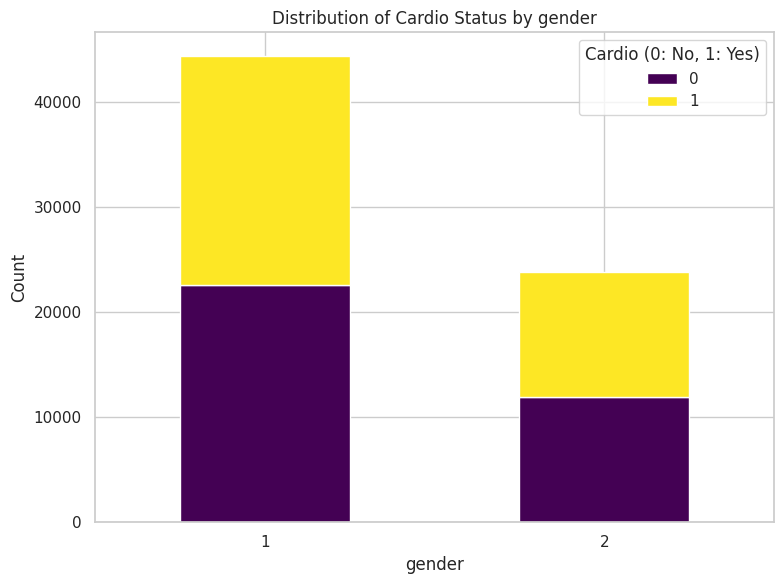

--- Analyzing relationship between 'cholesterol' and 'cardio' ---
Cross-Tabulation:
cardio           0      1
cholesterol              
1            28935  22295
2             3733   5511
3             1857   5961




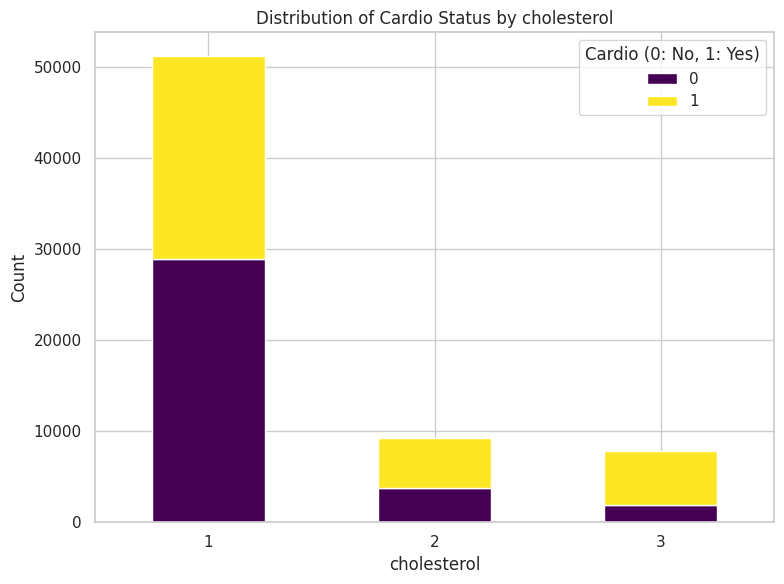

--- Analyzing relationship between 'gluc' and 'cardio' ---
Cross-Tabulation:
cardio      0      1
gluc                
1       30468  27633
2        2075   2947
3        1982   3187




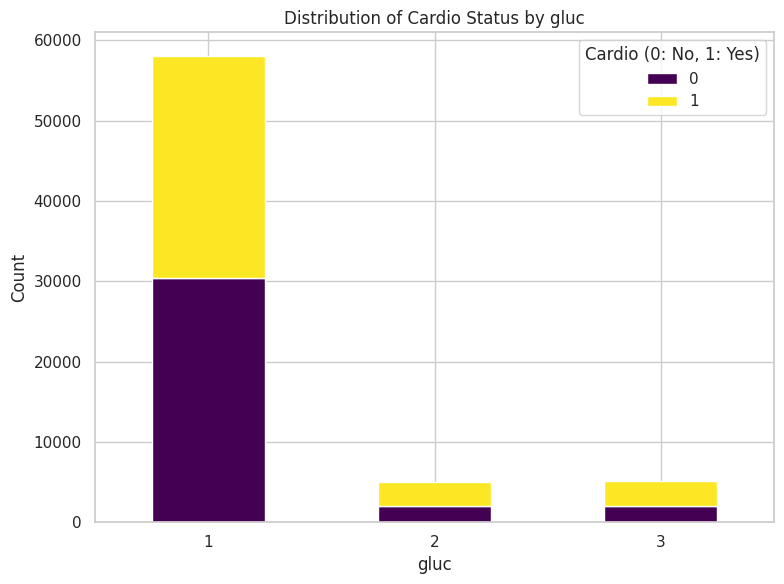

--- Analyzing relationship between 'smoke' and 'cardio' ---
Cross-Tabulation:
cardio      0      1
smoke               
0       31322  30948
1        3203   2819




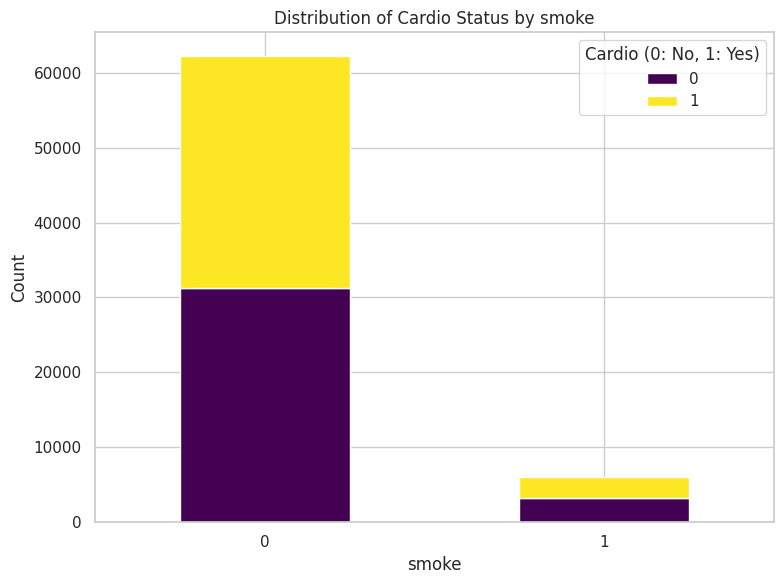

--- Analyzing relationship between 'alco' and 'cardio' ---
Cross-Tabulation:
cardio      0      1
alco                
0       32615  32028
1        1910   1739




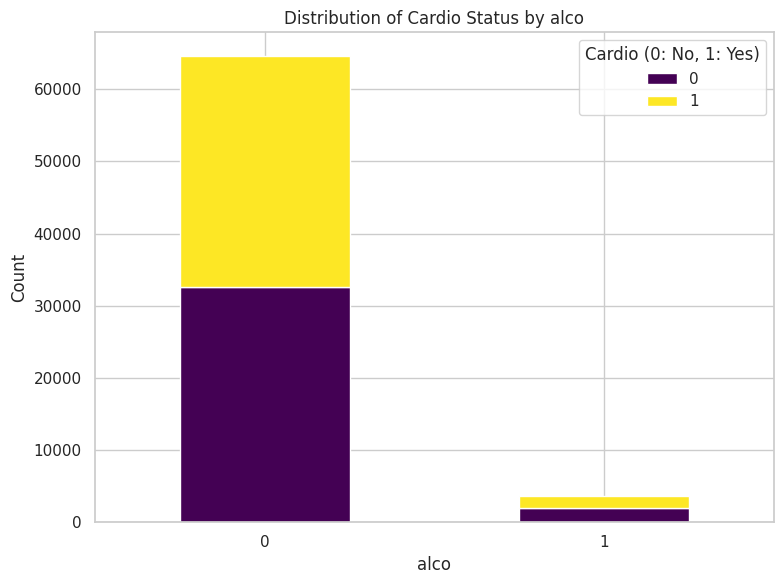

--- Analyzing relationship between 'active' and 'cardio' ---
Cross-Tabulation:
cardio      0      1
active              
0        6275   7151
1       28250  26616




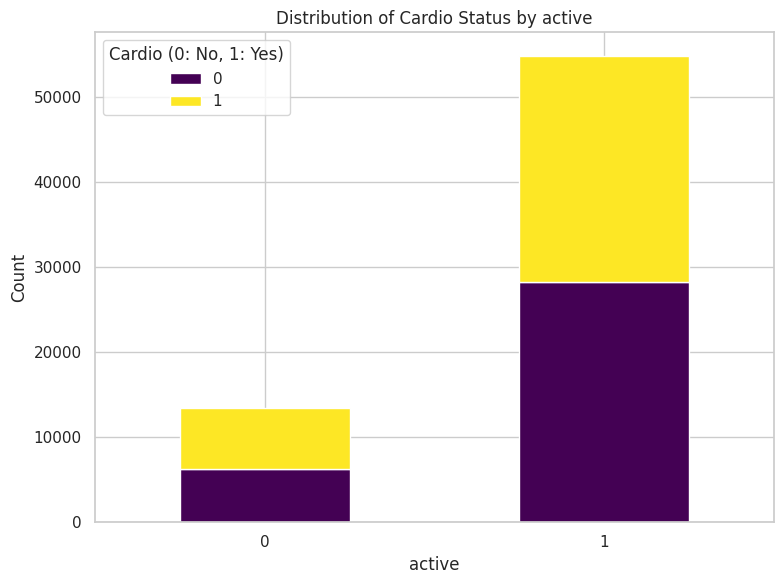

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure categorical_cols is defined. It was defined in a previous step, but re-defining
# for clarity within this step if executed independently.
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

print("Categorical vs Categorical Analysis with 'cardio':\n")

for col in categorical_cols:
    if col != 'cardio':
        print(f"--- Analyzing relationship between '{col}' and 'cardio' ---")
        # Create cross-tabulation
        crosstab_df = pd.crosstab(df_do[col], df_do['cardio'])
        print("Cross-Tabulation:")
        print(crosstab_df)
        print("\n")

        # Create a stacked bar chart
        crosstab_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
        plt.title(f'Distribution of Cardio Status by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.legend(title='Cardio (0: No, 1: Yes)')
        plt.tight_layout()
        plt.show()


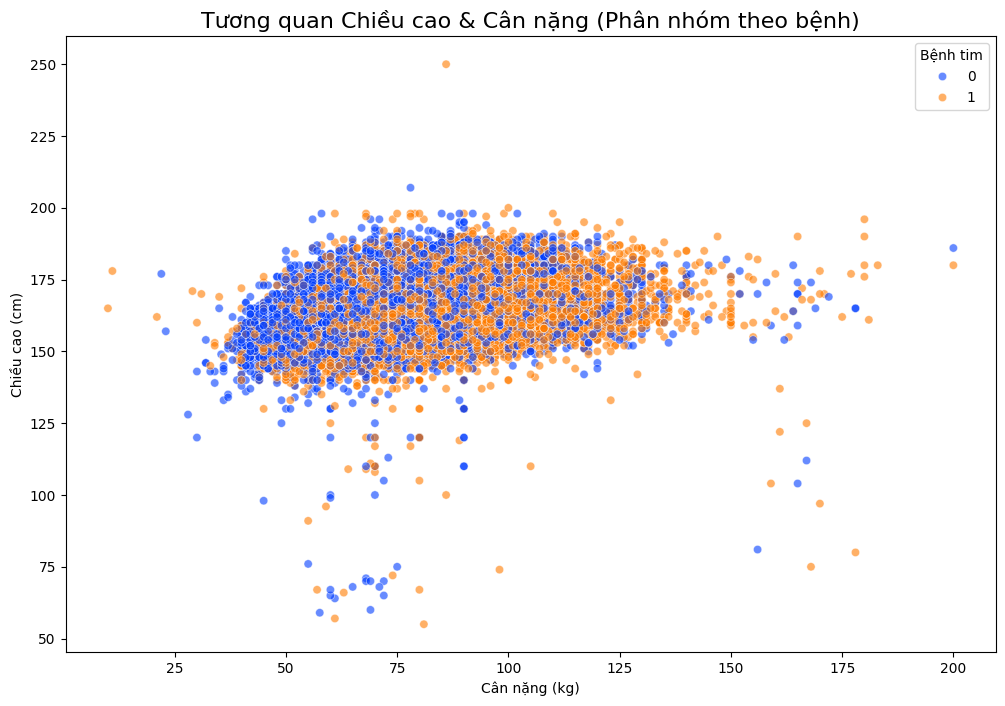

In [ ]:
plt.figure(figsize=(12, 8))

# Dùng alpha=0.6 để làm mờ các điểm, giúp nhìn rõ vùng mật độ cao
sns.scatterplot(data=df, x='weight', y='height', hue='cardio', alpha=0.6, palette='bright')

plt.title("Tương quan Chiều cao & Cân nặng (Phân nhóm theo bệnh)", fontsize=16)
plt.xlabel("Cân nặng (kg)")
plt.ylabel("Chiều cao (cm)")
plt.legend(title='Bệnh tim')
plt.show()